## WORD2VEC WITH TENSORFLOW 2.0 – A SIMPLE CBOW IMPLEMENTATION

[Originial Work](https://petamind.com/word2vec-with-tensorflow-2-0-a-simple-cbow-implementation/)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
print(tf.__version__)
##Output
#TensorFlow 2.x selected.
#2.0.0-rc2

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


## BUILD THE W2V-CBOW MODEL

The model will take the vocabulary size, embedding dimension, and an optimizer to train. By default, we use stochastic gradient descent (SGD) for the optimizer but you can try with Adam optimizer.

In [5]:
class Word2Vec:
  def __init__(self, vocab_size=0, embedding_dim=16, optimizer='sgd', epochs=10000):
    self.vocab_size=vocab_size
    self.embedding_dim=5
    self.epochs=epochs
    if optimizer=='adam':
      self.optimizer = tf.optimizers.Adam()
    else:
      self.optimizer = tf.optimizers.SGD(learning_rate=0.1)

  def train(self, x_train=None, y_train=None):
    self.W1 = tf.Variable(tf.random.normal([self.vocab_size, self.embedding_dim]))
    self.b1 = tf.Variable(tf.random.normal([self.embedding_dim])) #bias
    self.W2 = tf.Variable(tf.random.normal([self.embedding_dim, self.vocab_size]))
    self.b2 = tf.Variable(tf.random.normal([self.vocab_size]))
    for _ in range(self.epochs):
      with tf.GradientTape() as t:
        hidden_layer = tf.add(tf.matmul(x_train,self.W1),self.b1)
        output_layer = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, self.W2), self.b2))
        cross_entropy_loss = tf.reduce_mean(-tf.math.reduce_sum(y_train * tf.math.log(output_layer), axis=[1]))
      grads = t.gradient(cross_entropy_loss, [self.W1, self.b1, self.W2, self.b2])
      self.optimizer.apply_gradients(zip(grads,[self.W1, self.b1, self.W2, self.b2]))
      if(_ % 1000 == 0):
        print(cross_entropy_loss)

  def vectorized(self, word_idx):
    return (self.W1+self.b1)[word_idx]

Training method takes 2 inputs x_train and y_train that are one-hot vectors. We continuously optimize the weight and bias using tf.GradientTape().

Optionally, we can add a method to check how a word looks like after embedding.

## ONE-HOT INPUT

We will process the corpus input to the one-hot presentation before testing the model.

In [6]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

In [7]:
# convert to lower case
corpus_raw = corpus_raw.lower()
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
#sentences:
#[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]

We choose window size to 2.

In [8]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] :
            if nb_word != word:
                data.append([word, nb_word])

#data:
#[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]

For convenience, create 2 helper dictionaries, i.e. word2int and int2word. They do the simple mapping between words and corresponding integer values.

In [9]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

Encode to x_train and y_train



In [10]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train, dtype='float32')
y_train = np.asarray(y_train, dtype='float32')

## TRAIN THE MODEL

In [12]:
w2v = Word2Vec(vocab_size=vocab_size, optimizer='adam', epochs=1000)
w2v.train(x_train, y_train)

tf.Tensor(3.3283525, shape=(), dtype=float32)


In [13]:
#training process
tf.Tensor(2.8971386, shape=(), dtype=float32)
tf.Tensor(1.4061855, shape=(), dtype=float32)
tf.Tensor(1.3393705, shape=(), dtype=float32)
tf.Tensor(1.324885, shape=(), dtype=float32)
tf.Tensor(1.3221014, shape=(), dtype=float32)
tf.Tensor(1.3211844, shape=(), dtype=float32)
tf.Tensor(1.320798, shape=(), dtype=float32)
tf.Tensor(1.3206141, shape=(), dtype=float32)
tf.Tensor(1.3205199, shape=(), dtype=float32)
tf.Tensor(1.3204701, shape=(), dtype=float32)

NameError: name 'float32' is not defined

In [19]:
w2v.vectorized(word2int['queen'])

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.01649236,  0.17266607,  1.8695474 ,  2.8846657 ,  1.763518  ],
      dtype=float32)>

## VISUALISE WORDS IN 2D SPACE

Transform to 2d space

In [18]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

ValueError: perplexity must be less than n_samples

Plot all words

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Index out of range using input dim 0; input has only 0 dims [Op:StridedSlice] name: strided_slice/

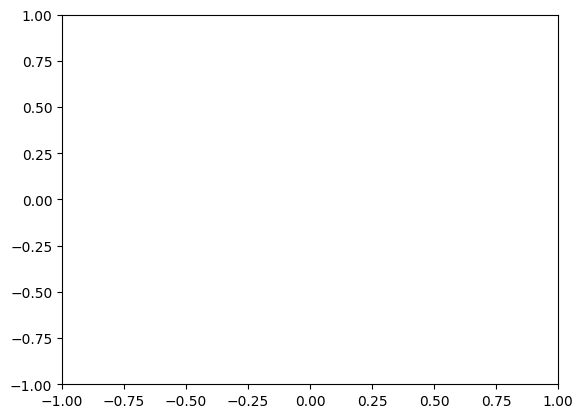

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom=-1, top=1)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()